In [2]:
from collections import defaultdict

class Graph:
    def __init__(self, filename):
        self.graph = defaultdict(dict)
        self.nodes = {}
        with open(filename, 'r') as f:
            for line in f.readlines():
                tokens = line.split()
                if len(tokens) == 2:
                    v, demand = tokens
                    self.nodes[v] = int(demand)
                elif len(tokens) == 3:
                    v, w, cost = tokens
                    self.graph[v][w] = int(cost)
                    self.graph[w][v] = int(cost)

In [3]:
graph = Graph('data/input.txt')    

In [4]:
graph.graph

defaultdict(dict,
            {'A': {'D': 11, 'E': 19, 'F': 17, 'G': 18},
             'B': {'D': 16, 'E': 14, 'F': 18, 'G': 15},
             'C': {'D': 15, 'E': 16, 'F': 19, 'G': 13},
             'D': {'A': 11, 'B': 16, 'C': 15},
             'E': {'A': 19, 'B': 14, 'C': 16},
             'F': {'A': 17, 'B': 18, 'C': 19},
             'G': {'A': 18, 'B': 15, 'C': 13}})

In [5]:
graph.nodes

{'A': 550, 'B': 300, 'C': 450, 'D': 300, 'E': 350, 'F': 300, 'G': 350}

In [6]:
chromosome = {
    'A': 2,
    'B': 5,
    'C': 3,
    'D': 7,
    'E': 4,
    'F': 1,
    'G': 6
}

In [71]:
priorities = [0, 3, 1, 5, 6, 4, 2]
chromosome = {node: priority for node, priority in \
                          zip(sorted(graph.nodes), priorities)}

In [41]:
import random
import numpy as np

In [93]:
keys   = np.random.permutation(list(chromosome.keys()))
values = np.random.permutation(list(chromosome.values()))
chromosome = {k: v for k, v in zip(keys, values)}

In [94]:
chromosome

{'A': 5, 'B': 3, 'C': 4, 'D': 2, 'E': 0, 'F': 1, 'G': 6}

## Chromosome decoding

In [95]:
import copy

In [96]:
transp = copy.deepcopy(graph.graph)
for v in transp:
    for w in transp[v]:
        transp[v][w] = 0

In [97]:
transp

defaultdict(dict,
            {'A': {'D': 0, 'E': 0, 'F': 0, 'G': 0},
             'B': {'D': 0, 'E': 0, 'F': 0, 'G': 0},
             'C': {'D': 0, 'E': 0, 'F': 0, 'G': 0},
             'D': {'A': 0, 'B': 0, 'C': 0},
             'E': {'A': 0, 'B': 0, 'C': 0},
             'F': {'A': 0, 'B': 0, 'C': 0},
             'G': {'A': 0, 'B': 0, 'C': 0}})

In [98]:
cap = copy.deepcopy(graph.nodes)

In [99]:
cap

{'A': 550, 'B': 300, 'C': 450, 'D': 300, 'E': 350, 'F': 300, 'G': 350}

In [100]:
for v in sorted(chromosome, key=chromosome.get, reverse=True):
    for w in sorted(graph.graph[v], key=graph.graph[v].get):
        consumption = min(cap[v], cap[w])
        transp[v][w] += consumption
        transp[w][v] += consumption
        cap[v] -= consumption
        cap[w] -= consumption

In [101]:
transp

defaultdict(dict,
            {'A': {'D': 300, 'E': 0, 'F': 250, 'G': 0},
             'B': {'D': 0, 'E': 250, 'F': 50, 'G': 0},
             'C': {'D': 0, 'E': 100, 'F': 0, 'G': 350},
             'D': {'A': 300, 'B': 0, 'C': 0},
             'E': {'A': 0, 'B': 250, 'C': 100},
             'F': {'A': 250, 'B': 50, 'C': 0},
             'G': {'A': 0, 'B': 0, 'C': 350}})

In [102]:
def calculate_cost(transp, cost):
    res = 0 
    for v in transp:
        for w in transp[v]:
            res += transp[v][w] * cost[v][w]
    return res / 2

In [103]:
calculate_cost(transp, graph.graph)

18100.0

## Genetic Algorithm

In [19]:
len(chromosome)

7

In [1]:
import random
import numpy as np
from deap import creator, base, tools, algorithms

In [120]:
creator.create('FitnessMin', base.Fitness, weights=(-1.0,))
creator.create('Individual', list, fitness=creator.FitnessMin)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [122]:
N_NODES = 7

In [123]:
toolbox = base.Toolbox()

toolbox.register('permutation', random.sample, range(N_NODES), N_NODES)
toolbox.register('individual', tools.initIterate, creator.Individual,
                 toolbox.permutation)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [124]:
chromosome

{'A': 5, 'B': 3, 'C': 4, 'D': 2, 'E': 0, 'F': 1, 'G': 6}

In [125]:
graph.nodes

{'A': 550, 'B': 300, 'C': 450, 'D': 300, 'E': 350, 'F': 300, 'G': 350}

In [126]:
def evalTransp(individual):
    chromosome = {node: priority for node, priority in \
                          zip(sorted(graph.nodes), individual)}
    transp = copy.deepcopy(graph.graph)
    for v in transp:
        for w in transp[v]:
            transp[v][w] = 0
    cap = copy.deepcopy(graph.nodes)
    for v in sorted(chromosome, key=chromosome.get, reverse=True):
        for w in sorted(graph.graph[v], key=graph.graph[v].get):
            consumption = min(cap[v], cap[w])
            transp[v][w] += consumption
            transp[w][v] += consumption
            cap[v] -= consumption
            cap[w] -= consumption
    return calculate_cost(transp, graph.graph),

In [127]:
toolbox.register('evaluate', evalTransp)
toolbox.register('mate', tools.cxPartialyMatched)
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=2.0/N_NODES)
toolbox.register('select', tools.selTournament, tournsize=3)

In [186]:
pop = toolbox.population(n=4)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register('Avg', np.mean)
stats.register('Std', np.std)
stats.register('Min', np.min)
stats.register('Max', np.max)

In [187]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, 
                    stats=stats, halloffame=hof, verbose=True)

gen	nevals	Avg  	Std    	Min  	Max  
0  	4     	18200	176.777	18050	18500
1  	0     	18187.5	181.573	18050	18500
2  	2     	18075  	25     	18050	18100
3  	4     	18050  	0      	18050	18050
4  	3     	18050  	0      	18050	18050
5  	0     	18050  	0      	18050	18050


In [188]:
hof.items

[[1, 2, 4, 6, 5, 0, 3]]

In [189]:
evalTransp(hof.items[0])

(18050.0,)

In [190]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


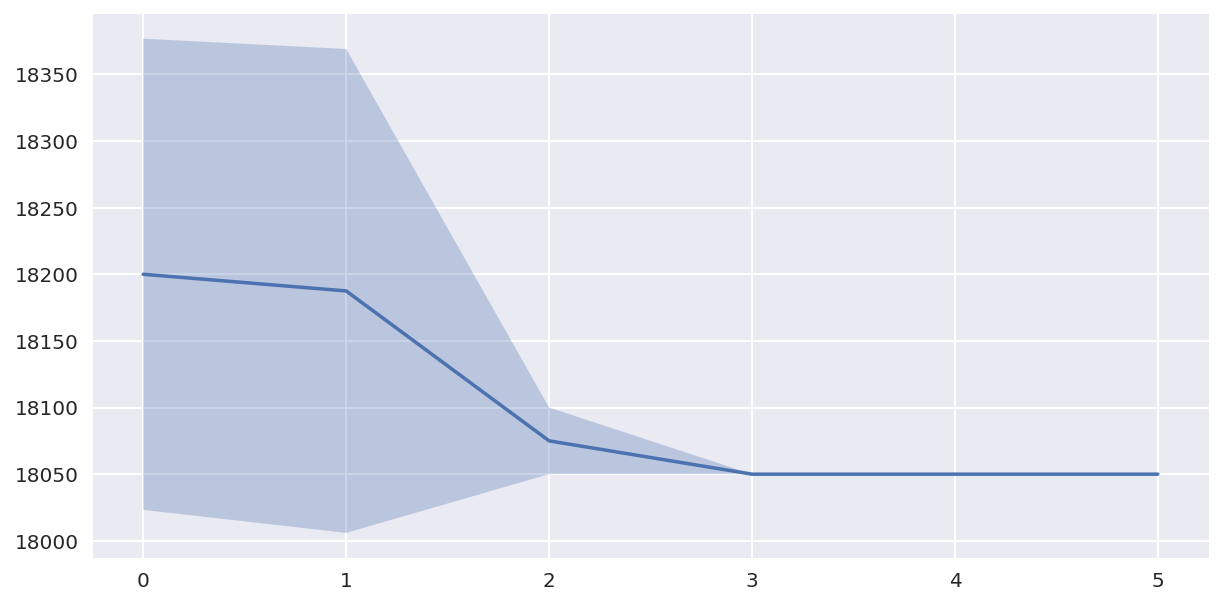

In [191]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot([x['gen'] for x in log],
        [x['Avg'] for x in log])
ax.fill_between([x['gen'] for x in log],
                 [x['Avg'] - x['Std'] for x in log],
                 [x['Avg'] + x['Std'] for x in log],
                 alpha=0.3)

In [192]:
log

[{'Avg': 18200.0,
  'Max': 18500.0,
  'Min': 18050.0,
  'Std': 176.7766952966369,
  'gen': 0,
  'nevals': 4},
 {'Avg': 18187.5,
  'Max': 18500.0,
  'Min': 18050.0,
  'Std': 181.57298807917437,
  'gen': 1,
  'nevals': 0},
 {'Avg': 18075.0,
  'Max': 18100.0,
  'Min': 18050.0,
  'Std': 25.0,
  'gen': 2,
  'nevals': 2},
 {'Avg': 18050.0,
  'Max': 18050.0,
  'Min': 18050.0,
  'Std': 0.0,
  'gen': 3,
  'nevals': 4},
 {'Avg': 18050.0,
  'Max': 18050.0,
  'Min': 18050.0,
  'Std': 0.0,
  'gen': 4,
  'nevals': 3},
 {'Avg': 18050.0,
  'Max': 18050.0,
  'Min': 18050.0,
  'Std': 0.0,
  'gen': 5,
  'nevals': 0}]